In [1]:
import numpy as np
from numba.typed import List as NumbaList
from BPmodule.BPGen import CreateData
from BPnumba.GeneticOperators import CreateHeuristicPob,InstancePob,MutateC2
from BPnumba.DFFA import createDFFA
from BPnumba.EDFFA import createEDFFA
import matplotlib.pyplot as plt

In [2]:
maxItr=1000
pop= 50


In [3]:
def TestFFA(alg, prb):
    contenedor,data = CreateData(algorithm=alg,problem=prb)
    datos = NumbaList(data[0])
    n= len(datos)
    gamma= 1/n
    datos = NumbaList(data[0])
    edffa = createEDFFA(mutType=1)
    edffa.Train(11,maxItr, InstancePob(NumbaList( CreateHeuristicPob(pop,datos,True)),datos,contenedor),datos,contenedor)
    dffa = createDFFA(mutType=0)
    dffa.Train(maxItr, InstancePob(NumbaList( CreateHeuristicPob(pop,datos,True)),datos,contenedor),datos,contenedor)

In [6]:
TestFFA(1,1)

In [9]:
contenedor,data = CreateData(algorithm=2,problem=3)
datos = NumbaList(data[0])
n= len(datos)
gamma= 1/n

In [10]:
datos = NumbaList(data[0])
edffa = createEDFFA(mutType=1)
edffa.Train(11,maxItr, InstancePob(NumbaList( CreateHeuristicPob(pop,datos,True)),datos,contenedor),datos,contenedor)

In [11]:
dffa = createDFFA()
dffa.Train(maxItr, InstancePob(NumbaList( CreateHeuristicPob(pop,datos,True)),datos,contenedor),datos,contenedor)

In [12]:
print("edffa best Fi: ",edffa.BestInd.fi)
print("dffa bestFi: ",dffa.BestInd.fi)

edffa best Fi:  0.986182
dffa bestFi:  0.966636


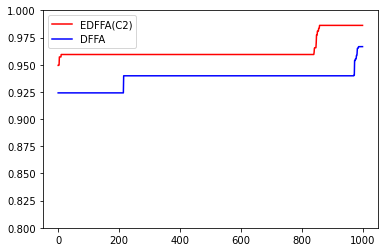

In [14]:
plt.figure()
plt.plot(edffa.bestfi,color='red',label="EDFFA(C2)")
plt.plot(dffa.bestfi,color='blue',label="DFFA")
plt.legend()
plt.ylim(0.8,1)
plt.show()

In [13]:
dffa = createDFFA(mutType=0)
dffa.Train(maxItr, InstancePob(NumbaList( CreateHeuristicPob(pop,datos,True)),datos,contenedor),datos,contenedor)
print(dffa.BestInd.fi)
plt.figure()
plt.plot(dffa.bestfi,color='red')
plt.ylim(0.8,1)
plt.show()